In [2]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt


In [3]:
from sklearn.preprocessing import normalize
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
from sklearn import tree
from sklearn.model_selection import cross_validate
from sklearn.metrics import mean_squared_error
import xgboost as xgb
import pickle


"""Since it is a regression problem, I will use the most regression friendly algorythms, those are dec.Tree and linear regr"""

regr = LinearRegression()


In [4]:
dfrent = pd.read_csv('../Project-5-scikitlearn/rent.csv')
dfsale = pd.read_csv('../Project-5-scikitlearn/sale.csv')

dfsale.drop(columns = ['Unnamed: 0','propertyCode','operation','priceByArea']) 
dfrent.drop(columns = ['Unnamed: 0','propertyCode','operation','priceByArea'])

dfsale[['price','size','floorNumeric']] = dfsale[['price','size','floorNumeric']].astype(int) #specifically this columns convert to integer
dfrent[['price','size','floorNumeric']] = dfrent[['price','size','floorNumeric']].astype(int)

In [5]:
rentdummy = pd.get_dummies(dfrent)
saledummy = pd.get_dummies(dfsale)

In [55]:
x_train, x_test, y_train, y_test = train_test_split(rentdummy[['size', 'rooms', 'bathrooms', 'latitude', 'longitude', 'floorNumeric', 'propertyType_duplex','propertyType_flat', 'propertyType_penthouse', 'propertyType_studio']], rentdummy['price'], test_size=0.75,train_size=0.25, random_state=2)


#standardized
x_train_standar = StandardScaler().fit_transform(x_train)
x_test_standar = StandardScaler().fit_transform(x_test)

y_train_standar = StandardScaler().fit_transform(np.array(y_train).reshape(-1,1))
y_test_standar = StandardScaler().fit_transform(np.array(y_test).reshape(-1,1))

y_train_shaped = np.array(y_train).reshape(-1,1)

best_acc = []
acc_list = []


model1 = regr.fit(x_train, y_train_shaped) #Linear model with raw data
cv_acc = cross_validate(model1, x_train, y_train, cv=10)['test_score'].mean()
best_acc.append([cv_acc, 'regression raw'])
acc_list.append(cv_acc)

model2 = regr.fit(x_train_standar, y_train_standar)#Linear model with standard data
cv_acc = cross_validate(model2, x_train_standar, y_train_standar, cv=10)['test_score'].mean()
best_acc.append([cv_acc, 'regression standard'])
acc_list.append(cv_acc)


for depth in range(5,11): #Decision tree loop for raw data
        treereg = tree.DecisionTreeRegressor(max_depth=depth)
        model = treereg.fit(x_train, y_train)
        cv_acc = cross_validate(model, x_train, y_train, cv=10)['test_score'].mean()
        best_acc.append([cv_acc,'tree raw', depth])
        acc_list.append(cv_acc)

for depth in range(5,11): #Decision tree loop for standard data
        treereg = tree.DecisionTreeRegressor(max_depth=depth)
        model = treereg.fit(x_train_standar, y_train_standar)
        cv_acc = cross_validate(model, x_train, y_train, cv=10)['test_score'].mean()
        best_acc.append([cv_acc,'tree standard', depth])
        acc_list.append(cv_acc)


for best in best_acc:
        if best[0] == max(acc_list):
                print("best",best)
        elif best[0]== min(acc_list):
                print("worst", best)

best_acc


best [0.5450901946096014, 'regression raw']
worst [-0.25113653293081234, 'tree raw', 7]


[[0.5450901946096014, 'regression raw'],
 [0.5404706694517023, 'regression standard'],
 [0.16610847882692814, 'tree raw', 5],
 [-0.22635571063691368, 'tree raw', 6],
 [-0.25113653293081234, 'tree raw', 7],
 [-0.23893286540652384, 'tree raw', 8],
 [0.0647337478968772, 'tree raw', 9],
 [0.02088060806358478, 'tree raw', 10],
 [0.26157986279930245, 'tree standard', 5],
 [0.32160941523089476, 'tree standard', 6],
 [0.1821575061229167, 'tree standard', 7],
 [0.14142982201238, 'tree standard', 8],
 [0.040144494672168164, 'tree standard', 9],
 [-0.15117159964703278, 'tree standard', 10]]

In [56]:
#The cross validation indicates that for the rent model, we will use regression and raw data
rentmodel = regr.fit(x_train, y_train)

rent_prediction = rentmodel.predict(x_test)

r2_score(y_test, rent_prediction)

0.7641632214550332

In [57]:
#Testing with more random data the best model

test_rent = pd.read_csv('../Project-5-scikitlearn/rent_test_cleaned.csv')
test_rent.drop(columns = ['Unnamed: 0','propertyCode','operation','priceByArea'],inplace =True)
test_rent[['price','size','floorNumeric']] = test_rent[['price','size','floorNumeric']].astype(int)
test_rent_dummy = pd.get_dummies(test_rent)
test_rent_dummy

predict = rentmodel.predict(test_rent_dummy[['size', 'rooms', 'bathrooms', 'latitude', 'longitude', 'floorNumeric', 'propertyType_duplex','propertyType_flat', 'propertyType_penthouse', 'propertyType_studio']])
r2_score(test_rent_dummy['price'], predict)

0.7068262576821872

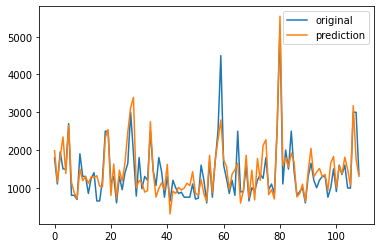

In [59]:
x_ax = range(len(predict))
plt.plot(x_ax, test_rent_dummy['price'], label='original')
plt.plot(x_ax, predict, label='prediction')
plt.legend()
plt.show()

In [9]:
filename_rent = 'rent_model.sav'
pickle.dump(rentmodel, open(filename_rent,'wb'))

In [11]:
x_trainsale, x_testsale, y_trainsale, y_testsale = train_test_split(saledummy[['size', 'rooms', 'bathrooms', 'latitude', 'longitude', 'floorNumeric', 'propertyType_duplex','propertyType_flat', 'propertyType_penthouse', 'propertyType_studio']], saledummy['price'], test_size=0.75,train_size=0.25, random_state= 3)


#standardized
x_train_standarsale = StandardScaler().fit_transform(x_trainsale)
x_test_standarsale = StandardScaler().fit_transform(x_testsale)

y_train_standarsale = StandardScaler().fit_transform(np.array(y_trainsale).reshape(-1,1))
y_test_standarsale = StandardScaler().fit_transform(np.array(y_testsale).reshape(-1,1))

y_train_shapedsale = np.array(y_trainsale).reshape(-1,1)

best_acc = []
acc_list = []


model1 = regr.fit(x_trainsale, y_train_shapedsale) #Linear model with raw data
cv_acc = cross_validate(model1, x_trainsale, y_trainsale, cv=10)['test_score'].mean()
best_acc.append([cv_acc, 'regression raw'])
acc_list.append(cv_acc)

model2 = regr.fit(x_train_standarsale, y_train_standarsale)#Linear model with standard data
cv_acc = cross_validate(model2, x_train_standarsale, y_train_standarsale, cv=10)['test_score'].mean()
best_acc.append([cv_acc, 'regression standard'])
acc_list.append(cv_acc)


for depth in range(5,11): #Decision tree loop for raw data
        treereg = tree.DecisionTreeRegressor(max_depth=depth)
        model = treereg.fit(x_trainsale, y_trainsale)
        cv_acc = cross_validate(model, x_trainsale, y_trainsale, cv=10)['test_score'].mean()
        best_acc.append([cv_acc,'tree raw', depth])
        acc_list.append(cv_acc)

for depth in range(5,11): #Decision tree loop for standard data
        treereg = tree.DecisionTreeRegressor(max_depth=depth)
        model = treereg.fit(x_train_standarsale, y_train_standarsale)
        cv_acc = cross_validate(model, x_trainsale, y_trainsale, cv=10)['test_score'].mean()
        best_acc.append([cv_acc,'tree standard', depth])
        acc_list.append(cv_acc)


for best in best_acc:
        if best[0] == max(acc_list):
                print("best",best)
        elif best[0]== min(acc_list):
                print("worst", best)

best_acc


worst [-0.7136658970402168, 'regression standard']
best [0.4066431466702765, 'tree standard', 5]


[[-0.7136453125857434, 'regression raw'],
 [-0.7136658970402168, 'regression standard'],
 [0.3523473391368125, 'tree raw', 5],
 [0.2881933197744661, 'tree raw', 6],
 [0.36517266982950825, 'tree raw', 7],
 [0.32775888123261615, 'tree raw', 8],
 [0.2471703402095889, 'tree raw', 9],
 [0.13376479446173278, 'tree raw', 10],
 [0.4066431466702765, 'tree standard', 5],
 [0.34178358839274764, 'tree standard', 6],
 [0.3239608328265645, 'tree standard', 7],
 [0.2983056637610798, 'tree standard', 8],
 [0.3010576543376168, 'tree standard', 9],
 [0.32724664401408754, 'tree standard', 10]]

In [12]:
#The results of the cross validation indicates that the best model is tree standard with depth 5
treeregr = tree.DecisionTreeRegressor(max_depth=5)
salemodel = treeregr.fit(x_train_standarsale, y_train_standarsale)
sale_prediction = salemodel.predict(x_test_standarsale)
r2_score(y_test_standarsale, sale_prediction)


0.4652112134807489

In [13]:
test_sale = pd.read_csv('../Project-5-scikitlearn/sale_test_cleaned.csv')
test_sale.drop(columns = ['Unnamed: 0','propertyCode','operation','priceByArea'],inplace =True)
test_sale[['price','size','floorNumeric']] = test_sale[['price','size','floorNumeric']].astype(int)
test_sale_dummy = pd.get_dummies(test_sale)


test_predict = salemodel.predict(StandardScaler().fit_transform(test_sale_dummy[['size', 'rooms', 'bathrooms', 'latitude', 'longitude', 'floorNumeric', 'propertyType_duplex','propertyType_flat', 'propertyType_penthouse', 'propertyType_studio']]))

r2_score( StandardScaler().fit_transform(np.array(test_sale_dummy['price']).reshape(-1,1)), test_predict)

0.17648012759143616

In [ ]:

#since it gives a very low score with the test data, we will use the ensemble method with the xgboost library in the next cells 



In [ ]:
data_dmatrix = xgb.DMatrix(data= x_trainsale, label=y_trainsale)

In [42]:
#The next cells are cross validation between different hyperparameters and for the metric score it will be used the root mean squared error (RMSE) which it will measue the distance between the predicted and the actual value. The lowest, the most accurate

parameters = {'booster':'gblinear','objective':'reg:linear','learning_rate':1,'reg_alpha':20}
cv_results = xgb.cv(dtrain=data_dmatrix, params=parameters, num_boost_round=50, early_stopping_rounds=10, metrics="rmse", as_pandas=True, seed=5)
cv_results

,train-rmse-mean,train-rmse-std,test-rmse-mean,test-rmse-std
0,369820.760417,37977.039177,386084.979167,38961.796866
1,349403.114583,37692.292596,381985.812500,22500.355877
2,313997.468750,12225.158579,360055.000000,28586.590020


In [24]:
#In the previous model, it indicate that the best model was decition tree, we are going to implement it

parameters2 = {'booster':'gbtree','objective':'reg:linear','learning_rate':1,'reg_alpha':20, 'max_depth':7}

cv_results = xgb.cv(dtrain=data_dmatrix, params=parameters2, num_boost_round=50, early_stopping_rounds=10, metrics="rmse", as_pandas=True, seed=1)
cv_results

[19:49:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/objective/regression_obj.cu:171: reg:linear is now deprecated in favor of reg:squarederror.
[19:49:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/objective/regression_obj.cu:171: reg:linear is now deprecated in favor of reg:squarederror.
[19:49:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/objective/regression_obj.cu:171: reg:linear is now deprecated in favor of reg:squarederror.


,train-rmse-mean,train-rmse-std,test-rmse-mean,test-rmse-std
0,222414.072917,14779.407819,363093.291667,99086.595206
1,116765.075521,8621.073010,319417.916667,90731.082201
2,70817.330729,6189.539543,307385.265625,80594.317370


In [25]:
parameters3 = {'booster':'gbtree','objective':'reg:linear','learning_rate':0.6,'reg_alpha':20, 'max_depth':7}#this parameters seems promising
cv_results = xgb.cv(dtrain=data_dmatrix, params=parameters3, num_boost_round=50, early_stopping_rounds=10, metrics="rmse", as_pandas=True, seed=2)
cv_results

[19:50:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/objective/regression_obj.cu:171: reg:linear is now deprecated in favor of reg:squarederror.
[19:50:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/objective/regression_obj.cu:171: reg:linear is now deprecated in favor of reg:squarederror.
[19:50:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/objective/regression_obj.cu:171: reg:linear is now deprecated in favor of reg:squarederror.


,train-rmse-mean,train-rmse-std,test-rmse-mean,test-rmse-std
0,407903.625000,20605.184441,453416.541667,50065.491619
1,235301.869792,14672.555359,339243.927083,50605.285108
2,151850.041667,12010.794492,307630.848958,61327.547532
3,102806.710938,8219.288978,302670.515625,64326.150399
4,74427.705729,6456.501694,302310.312500,61278.320816
5,55620.744792,5124.703338,302090.156250,58560.385372


In [38]:
xgb_regr2 = xgb.XGBRegressor(verbosity=0,booster='gbtree', objective ='reg:linear', learning_rate=0.6 ,reg_alpha = 20, n_estimators = 6, max_depth=7)


In [61]:
xgb_regr2.fit(x_trainsale, y_trainsale)
xgpredict2 = xgb_regr2.predict(x_testsale)
print(np.sqrt(mean_squared_error(y_testsale, xgpredict2))) #promising results

286634.8789914944
C:\Users\Sebas!\AppData\Local\Programs\Python\Python38\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


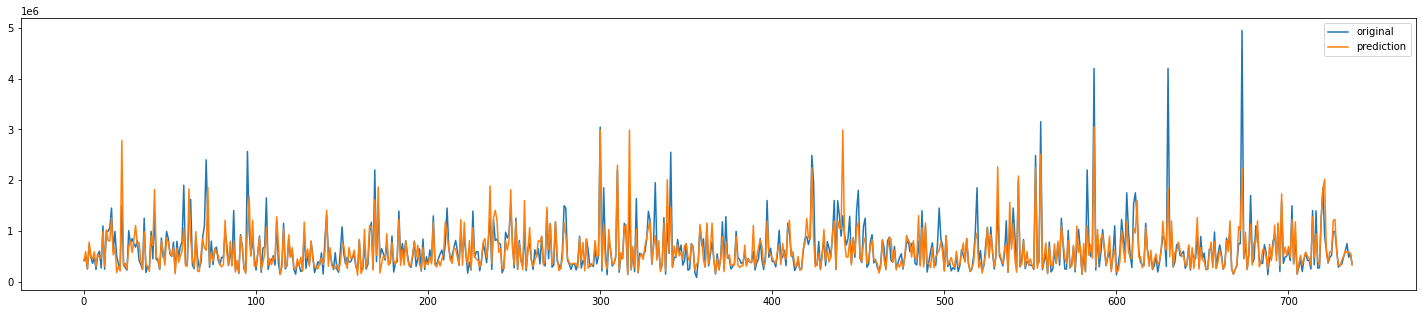

In [35]:
x_ax = range(len(y_testsale))
plt.figure(figsize=(25,5))
plt.plot(x_ax, y_testsale, label='original')
plt.plot(x_ax, xgpredict2, label='prediction')
plt.legend()
plt.show()

In [60]:
prediction_test = xgb_regr2.predict(test_sale_dummy[['size', 'rooms', 'bathrooms', 'latitude', 'longitude', 'floorNumeric', 'propertyType_duplex','propertyType_flat', 'propertyType_penthouse', 'propertyType_studio']])
print(np.sqrt(mean_squared_error(test_sale_dummy['price'], prediction_test))) 
#this results seems enough, it's the lowest value that i managed to get

259781.0205952696
C:\Users\Sebas!\AppData\Local\Programs\Python\Python38\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


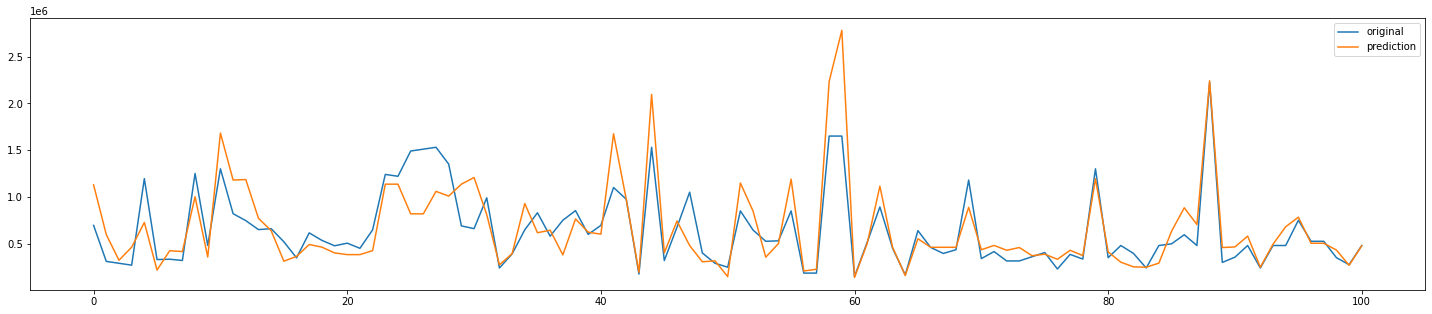

In [41]:
x_ax = range(len(prediction_test))
plt.figure(figsize=(25,5))
plt.plot(x_ax, test_sale_dummy['price'], label='original')
plt.plot(x_ax, prediction_test, label='prediction')
plt.legend()
plt.show()

In [62]:
xgb_regr2.save_model("sale_model.json")